In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [7]:
df = pd.read_csv("synthetic_credit_data.csv")

In [6]:
print(df.head())
print(df.describe())

   age  years_with_bank    income  credit_score  has_loan  loan_amount    dti  \
0   24                1  39799.62           614         0         0.00  0.000   
1   74                1  21912.46           545         0         0.00  0.000   
2   65               25  26829.20           561         0         0.00  0.000   
3   50               22  33231.54           582         0         0.00  0.000   
4   49               24  46762.39           554         1     26535.46  0.567   

   missed_payments  prob_default  default employment_status      housing  
0                0        0.0000        0          employed        villa  
1                0        0.0000        0           retired    hyresrätt  
2                0        0.0000        0           retired  bostadsrätt  
3                0        0.0000        0          employed   inneboende  
4                0        0.2248        0          employed  bostadsrätt  
               age  years_with_bank        income  credit_score

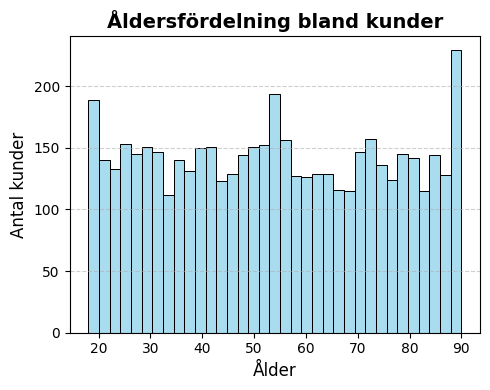

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df["age"], bins=35, kde=False, color="skyblue", edgecolor="black", alpha=0.7)

# Titlar och etiketter
plt.title("Åldersfördelning bland kunder", fontsize=14, fontweight="bold")
plt.xlabel("Ålder", fontsize=12)
plt.ylabel("Antal kunder", fontsize=12)


plt.grid(axis="y", linestyle="--", alpha=0.6)

# Tight layout
plt.tight_layout()
plt.show()


C:\Users\gisse\AppData\Local\Temp\ipykernel_22248\2306949596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="employment_status", data=df, palette="Set2")


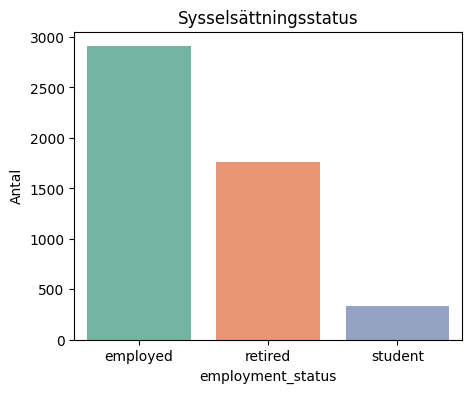

In [9]:
plt.figure(figsize=(5,4))
sns.countplot(x="employment_status", data=df, palette="Set2")
plt.title("Sysselsättningsstatus")
plt.ylabel("Antal")
plt.show()

C:\Users\gisse\AppData\Local\Temp\ipykernel_22248\707788076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="housing", data=df, palette="Set3")


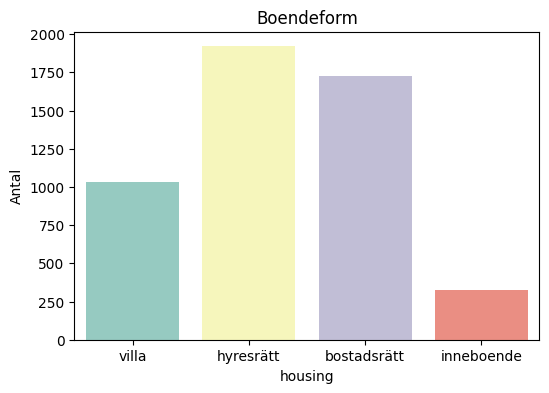

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x="housing", data=df, palette="Set3")
plt.title("Boendeform")
plt.ylabel("Antal")
plt.show()

### Ekonomi 


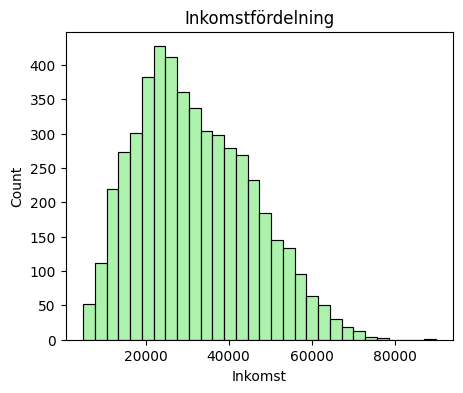

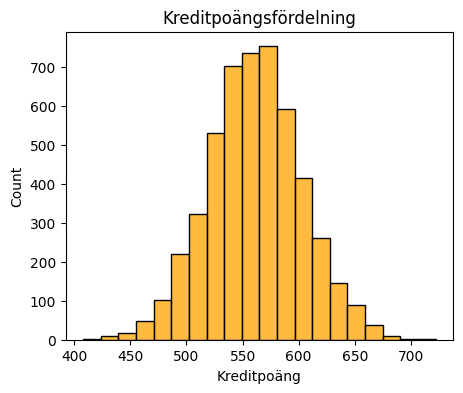

In [11]:
#Inkomsfördelning
plt.figure(figsize=(5,4))
sns.histplot(df["income"], bins=30, color="lightgreen")
plt.title("Inkomstfördelning")
plt.xlabel("Inkomst")
plt.show()

#Kreditpoängsfördelnig
plt.figure(figsize=(5,4))
sns.histplot(df["credit_score"], bins=20, color="orange")
plt.title("Kreditpoängsfördelning")
plt.xlabel("Kreditpoäng")
plt.show()

### Lån och betalningar 

Andel med lån: 22.12%


C:\Users\gisse\AppData\Local\Temp\ipykernel_22248\2381316815.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="has_loan", data=df, palette="coolwarm")


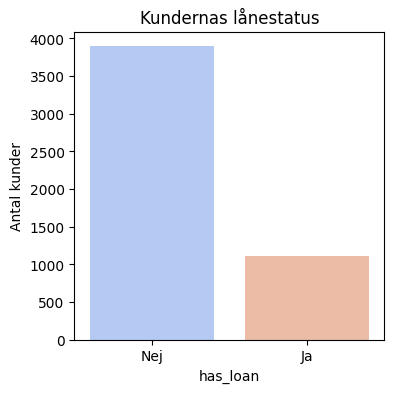

In [12]:
loan_rate = df["has_loan"].mean() * 100
print(f"Andel med lån: {loan_rate:.2f}%")

plt.figure(figsize=(4,4))
sns.countplot(x="has_loan", data=df, palette="coolwarm")
plt.title("Kundernas lånestatus")
plt.xticks([0,1], ["Nej","Ja"])
plt.ylabel("Antal kunder")
plt.show()

Default rate bland låntagare: 25.05%


C:\Users\gisse\AppData\Local\Temp\ipykernel_22248\302698521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="default", data=bor, palette="Reds")


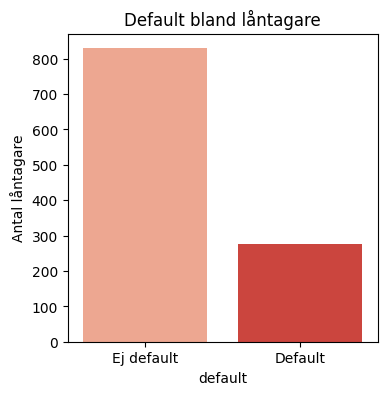

In [ ]:
# Default rate bland låntagare
bor = df[df["has_loan"]==1].copy()
default_rate = bor["default"].mean() * 100
print(f"Default rate bland låntagare: {default_rate:.2f}%")

plt.figure(figsize=(4,4))
sns.countplot(x="default", data=bor, palette="Reds")
plt.title("Default bland låntagare")
plt.xticks([0,1], ["Ej default","Default"])
plt.ylabel("Antal låntagare")
plt.show()


### Samband

C:\Users\gisse\AppData\Local\Temp\ipykernel_22248\1815656089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y="dti", data=bor, palette="Set1")


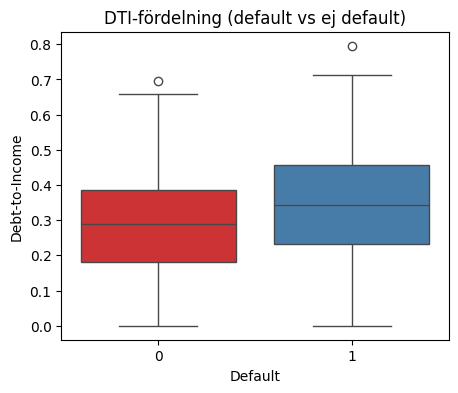

In [14]:
# DTI- fördelning
plt.figure(figsize=(5,4))
sns.boxplot(x="default", y="dti", data=bor, palette="Set1")
plt.title("DTI-fördelning (default vs ej default)")
plt.xlabel("Default")
plt.ylabel("Debt-to-Income")
plt.show()

C:\Users\gisse\AppData\Local\Temp\ipykernel_22248\1842189934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default", y="credit_score", data=bor, palette="Set2")


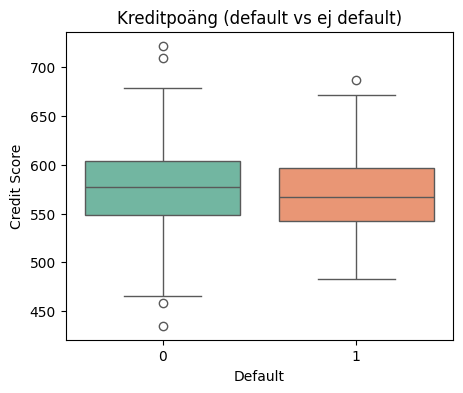

In [15]:
# Kreditpoäng - default vs ej default
plt.figure(figsize=(5,4))
sns.boxplot(x="default", y="credit_score", data=bor, palette="Set2")
plt.title("Kreditpoäng (default vs ej default)")
plt.xlabel("Default")
plt.ylabel("Credit Score")
plt.show()

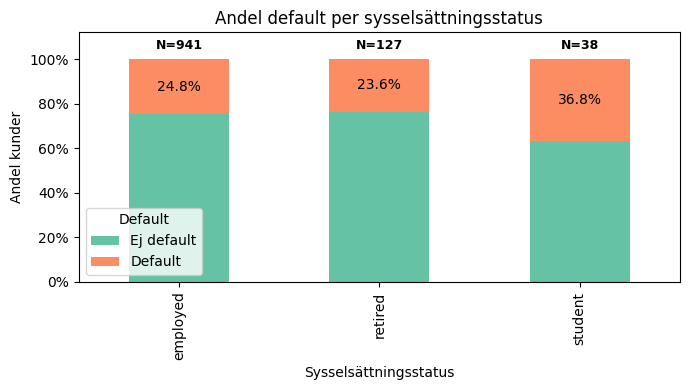

In [ ]:
#Andel default per sysselsätningsstatus

prop = bor.groupby(["employment_status","default"]).size().reset_index(name="count")
wide = prop.pivot(index="employment_status", columns="default", values="count").fillna(0).astype(int)

# Räkna om till andelar
perc = wide.div(wide.sum(axis=1), axis=0)

#färgtema
ax = perc.plot(kind="bar", stacked=True, figsize=(7,4),
               color=sns.color_palette("Set2")) 

ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.ylim(0, 1.12)
plt.title("Andel default per sysselsättningsstatus")
plt.ylabel("Andel kunder")
plt.xlabel("Sysselsättningsstatus")
plt.legend(title="Default", labels=["Ej default","Default"])

# procentetiketter för default
for c in ax.containers[-1:]:
    labels = [f"{v*100:.1f}%" if v > 0 else "" for v in c.datavalues]
    ax.bar_label(c, labels=labels, label_type="center", fontsize=10)

# Totala antal ovanför varje stapel
totals = wide.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(i, 1.03, f"N={total}", ha="center", va="bottom", fontsize=9, fontweight="bold")

plt.tight_layout()
plt.show()


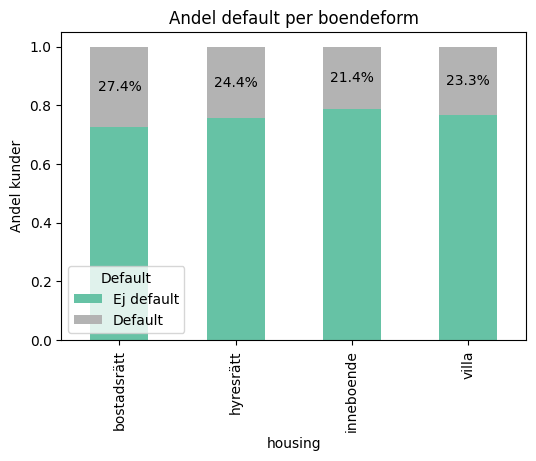

In [14]:
# Andel default per boendeform

prop = bor.groupby(["housing","default"]).size().reset_index(name="count")
prop = prop.pivot(index="housing", columns="default", values="count")

# Andelar per boendeform
prop = prop.div(prop.sum(axis=1), axis=0)

# 100% stackad bar chart
ax = prop.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")

plt.title("Andel default per boendeform")
plt.ylabel("Andel kunder")
plt.legend(title="Default", labels=["Ej default", "Default"])

for c in ax.containers[-1:]:
    ax.bar_label(c, labels=[f"{v*100:.1f}%" for v in c.datavalues], label_type="center")

plt.show()


### Korrelationsmatris för numeriska variabler

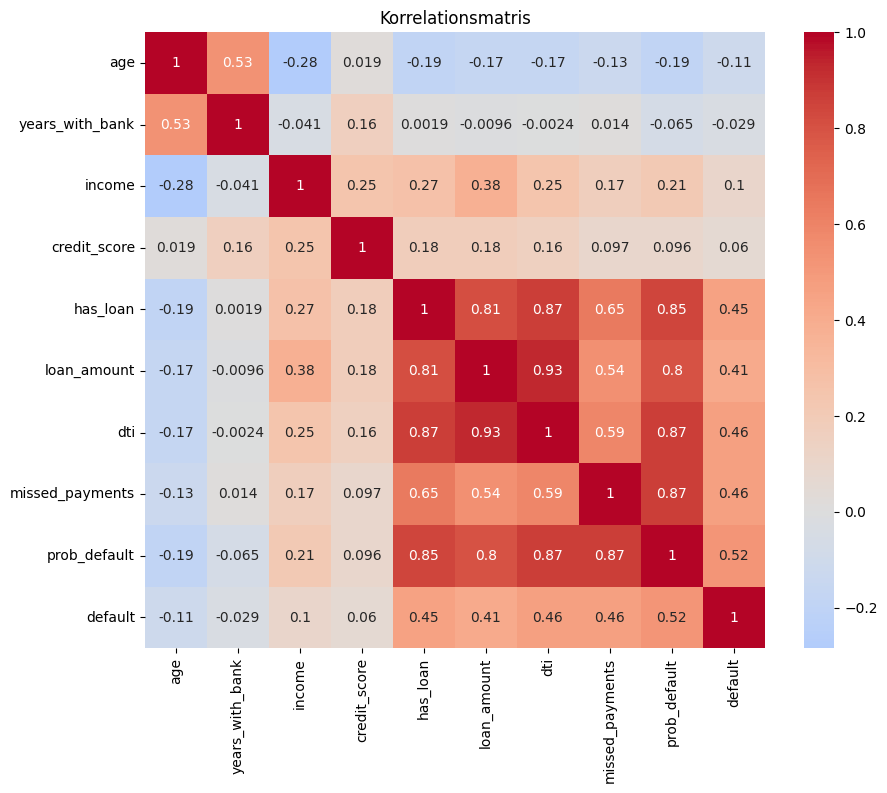

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationsmatris")
plt.show()